# User Research

In [1]:
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read data
df = pd.read_csv('INFOMPPM_data.csv', sep=';')

In [3]:
# Clean column names
columns = []

for c in df.columns:
    if '[' in c:
        columns.append(c[c.find('[')+1:c.find(']')])
    else: 
        columns.append(c)
        
df.columns = columns

In [5]:
# Change column type 
df_survey = df.astype({'It is important to me to receive media recommendations that are based on what I have watched before, even if this leads to less varied recommendations':'int',
       'It is important to me to receive media recommendations that are based on what I have “liked” or “rated” before, even if this leads to less varied recommendations':'int',
       'I want to be able to prevent media recommendations to re-appear in my recommendations, even if this leads to less varied recommendations':'int',
       'It is not important to me to receive media recommendations that are personalized to my specific preferences':'int',
       'I do not mind spending more time on searching for content if this means I get a wider variety of media recommendations':'int',
       'It is important to me to receive media recommendations that vary in directors, even if this means that the media recommendations are less personalized to my preferences':'int',
       'It is important to me to receive media recommendations that vary in the country of origin, even if this means that the media recommendations are less personalized to my preferences':'int',
       'It is important to me to receive media recommendations that vary in language, even if this means that the media recommendations are less personalized to my preferences':'int',
       'It is important to me to receive media recommendations that include actors from various backgrounds and cultures, even if this means that the media recommendations are less personalized to my preferences':'int',
       'It is important to me to receive media recommendations that vary in subject, even if this means that the media recommendations are less personalized to my preferences':'int'})

# Change values
df_survey['It is not important to me to receive media recommendations that are personalized to my specific preferences'].replace({1:5,5:1,2:4,4:2},inplace=True)

In [6]:
# Create separate dataframes for convenience and variation
df_convenience = df_survey.iloc[:, [2,3,4,5]].copy() 
df_variation = df_survey.iloc[:, [6,7,8,9,10,11,12]].copy()

# Change column names
df_convenience.columns = ['conv1','conv2','conv3','conv4']
df_variation.columns = ['var1','var2','var3','var4','var5','var6','var7']

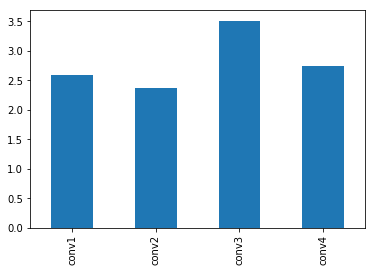

In [7]:
# Mean per question convenience
df_convenience.mean(axis=0).plot.bar()
plt.show()

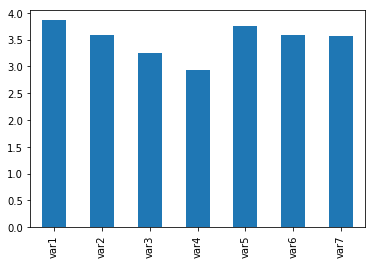

In [8]:
# Mean per question diversity
df_variation.mean(axis=0).plot.bar()
plt.show()

In [9]:
# Count respondents
display(df_survey.shape[0])

# Get max and min age
df_survey['What is your age?'].min(),df_survey['What is your age?'].max()

43

(15.0, 66.0)

In [10]:
# Calculate mean per person for both variation and convenience
mean_conv_per_person = df_convenience.mean(axis=1)
mean_var_per_person = df_variation.mean(axis=1)

In [12]:
# Perform one sample t-test for convenience
stats.ttest_1samp(a=mean_conv_per_person, popmean=2.5)

Ttest_1sampResult(statistic=2.6394141730758163, pvalue=0.011604467278644568)

In [ ]:
# Perform one sample t-test for diversity
stats.ttest_1samp(a=mean_var_per_person, popmean=2.5)